In [ ]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression,Ridge
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression
# import required packages

In [ ]:
df_copy=pd.read_csv(r"C:\Users\NIRJHAR\Documents\zico documents\heavy dataset\updated_sheet.csv")
print(df_copy.columns)
#read csv file

Index(['size', 'bath', 'balcony', 'price', 'area_type_Built-up  Area',
       'area_type_Carpet  Area', 'area_type_Plot  Area',
       'area_type_Super built-up  Area', 'Bed_BHK', 'Bed_Bedroom', 'Bed_RK',
       'net_sqft', 'status_April', 'status_August', 'status_December',
       'status_February', 'status_Immediate Possession', 'status_January',
       'status_July', 'status_June', 'status_March', 'status_May',
       'status_November', 'status_October', 'status_Ready To Move',
       'status_September', 'Zone_Central Bangalore', 'Zone_East Bangalore',
       'Zone_North-East Bangalore', 'Zone_North-West Bangalore',
       'Zone_Outskirts/Peripheral Bangalore', 'Zone_South Bangalore',
       'Zone_South-East Bangalore', 'Zone_South-West Bangalore',
       'Zone_Uncategorized', 'Zone_West Bangalore'],
      dtype='object')


In [ ]:
df_copy=pd.read_csv(r"C:\Users\NIRJHAR\Documents\zico documents\heavy dataset\updated_sheet.csv")
X=df_copy[['size', 'bath','area_type_Built-up  Area',
       'area_type_Carpet  Area', 'area_type_Plot  Area',
       'area_type_Super built-up  Area', 'Bed_BHK', 'Bed_Bedroom', 'Bed_RK',
       'net_sqft', 'status_April', 'status_August', 'status_December',
       'status_February', 'status_Immediate Possession', 'status_January',
       'status_July', 'status_June', 'status_March', 'status_May',
       'status_November', 'status_October', 'status_Ready To Move',
       'status_September', 'Zone_Central Bangalore', 'Zone_East Bangalore',
       'Zone_North-East Bangalore', 'Zone_North-West Bangalore',
       'Zone_Outskirts/Peripheral Bangalore', 'Zone_South Bangalore',
       'Zone_South-East Bangalore', 'Zone_South-West Bangalore',
       'Zone_Uncategorized', 'Zone_West Bangalore']]
Y= np.log1p(df_copy['price'])
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.5,random_state=True)
# define data for training ang testing

In [ ]:

Input= [('pol',PolynomialFeatures(degree=2,include_bias=False)),('scale',RobustScaler()),('model',Ridge(alpha=1.2))]
pipe=Pipeline(Input)
pipe.fit(x_train,y_train)
y_hat1= pipe.predict(x_train)
y_hat2= pipe.predict(x_test)
y_hat= pipe.predict(X)
print(pipe.score(x_train,y_train))
print(pipe.score(x_test,y_test))
print(pipe.score(X,Y))
#fit pipeline, train model, predict with training,testing and whole dataset.

0.6845691858715062
0.6624591604190067
0.6734774759376634


In [ ]:
scores = cross_val_score(pipe, x_test, y_test, cv=5)
print("CV scores:", scores)
print("Mean CV score:", scores.mean())
#for better generalisation use cross-val-score

CV scores: [0.57547432 0.63907259 0.61530643 0.57929854 0.61135574]
Mean CV score: 0.6041015216287278


In [ ]:
df_copy.describe()
#described data to find outliers

,size,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,Bed_BHK,Bed_Bedroom,...,Zone_Central Bangalore,Zone_East Bangalore,Zone_North-East Bangalore,Zone_North-West Bangalore,Zone_Outskirts/Peripheral Bangalore,Zone_South Bangalore,Zone_South-East Bangalore,Zone_South-West Bangalore,Zone_Uncategorized,Zone_West Bangalore
count,12018.000000,12018.000000,12018.000000,12018.000000,12018.000000,12018.000000,12018.000000,12018.000000,12018.000000,12018.000000,...,12018.000000,12018.000000,12018.000000,12018.000000,12018.000000,12018.000000,12018.000000,12018.000000,12018.000000,12018.000000
mean,1.600315,1.555203,7234.512232,79.444200,0.182976,0.006906,0.119987,0.690131,5.499834,0.585289,...,0.001914,0.065735,0.025628,0.007905,0.015976,0.062074,0.051173,0.014229,0.678482,0.010567
std,0.303346,0.306727,18752.902933,43.753838,0.386663,0.082820,0.324959,0.462458,5.153825,1.547804,...,0.043707,0.247828,0.158030,0.088561,0.125388,0.241299,0.220360,0.118437,0.467078,0.102258
min,1.000000,1.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.414214,1.414214,1.000000,48.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.414214,1.414214,1024.000000,67.000000,0.000000,0.000000,0.000000,1.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.732051,1.732051,1024.000000,99.137500,0.000000,0.000000,0.000000,1.000000,9.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,3.741657,3.872983,59049.000000,226.500000,1.000000,1.000000,1.000000,1.000000,196.000000,11.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Index(['size', 'bath', 'balcony', 'price', 'area_type_Built-up  Area',
       'area_type_Carpet  Area', 'area_type_Plot  Area',
       'area_type_Super built-up  Area', 'Bed_BHK', 'Bed_Bedroom', 'Bed_RK',
       'net_sqft', 'status_April', 'status_August', 'status_December',
       'status_February', 'status_January', 'status_July', 'status_June',
       'status_March', 'status_May', 'status_November', 'status_October',
       'status_Ready To Move', 'Zone_Central Bangalore', 'Zone_East Bangalore',
       'Zone_North-East Bangalore', 'Zone_North-West Bangalore',
       'Zone_Outskirts/Peripheral Bangalore', 'Zone_South Bangalore',
       'Zone_South-East Bangalore', 'Zone_South-West Bangalore',
       'Zone_Uncategorized', 'Zone_West Bangalore'],
      dtype='object')


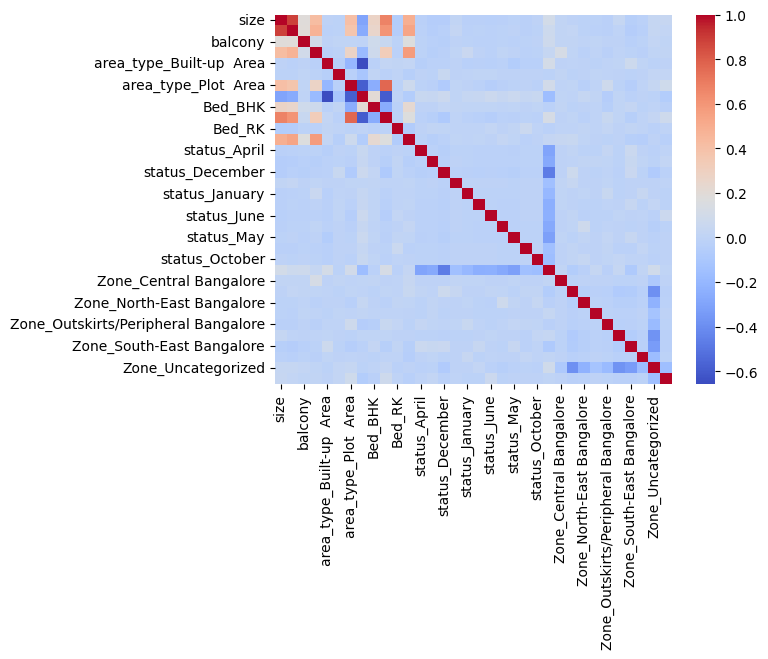

In [ ]:
print(df_copy.columns)
corr = df_copy.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.show()
#Visual correlation of features to analyse and remove unnescessary features, removed balcony from feature list

In [ ]:
print(df_copy.corr())
#numerical representation of the above

                                         size      bath   balcony     price  \
size                                 1.000000  0.875717  0.189669  0.579861   
bath                                 0.875717  1.000000  0.193852  0.618045   
balcony                              0.189669  0.193852  1.000000  0.146073   
price                                0.579861  0.618045  0.146073  1.000000   
area_type_Built-up  Area             0.003411 -0.000951 -0.002345 -0.014738   
area_type_Carpet  Area              -0.008816 -0.008325  0.010051  0.001715   
area_type_Plot  Area                 0.373781  0.343243 -0.019435  0.292628   
area_type_Super built-up  Area      -0.263928 -0.238910  0.013818 -0.193613   
Bed_BHK                              0.315559  0.255950  0.171505  0.193085   
Bed_Bedroom                          0.645311  0.592805  0.023581  0.387186   
Bed_RK                              -0.065372 -0.059849 -0.012697 -0.038591   
net_sqft                             0.499930  0.517

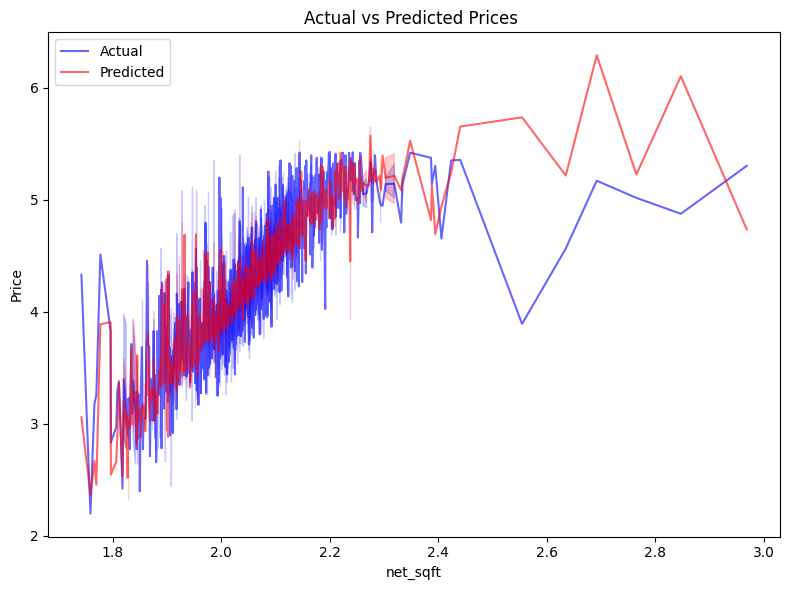

In [ ]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=x_test["net_sqft"], y=y_test, label='Actual', color='blue', alpha=0.6)
sns.lineplot(x=x_test["net_sqft"], y=y_hat2, label='Predicted', color='red', alpha=0.6)

plt.title(f"Actual vs Predicted Prices ")
plt.xlabel("net_sqft")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()
# plotted actual and predicted price against most dominant feature to visualise regression model